In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from collections import defaultdict
from collections import Counter
from astropy.io import fits

import importlib
import ctypes

In [ ]:
import malloc_wrap

for i in range(200):
    if i%10==0:
        print(i)
    nout, times = malloc_wrap.test_function(random.randint(0,100000000))


In [2]:
import ephem_forces
import demo


here 2 1


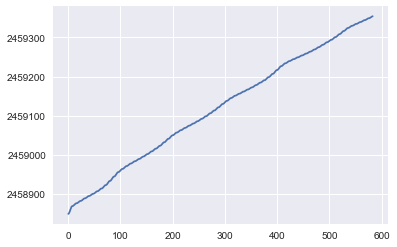

In [3]:
plt.plot(demo.times)

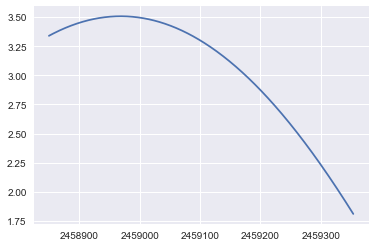

In [4]:
#plt.plot(demo.times, demo.states[:,1,:][:,0]-demo.states[:,1,:][:,0])
plt.plot(demo.times, demo.states[:,1,:][:,0])

In [9]:
demo.times.shape

(584,)

In [10]:
(demo.states[:,0,:]-demo.states[:,1,:])[:,0]

array([-1.00000000e-06, -1.00000753e-06, -1.00007739e-06, -1.00029694e-06,
       -1.00071696e-06, -1.00129447e-06, -1.00188625e-06, -1.00230264e-06,
       -1.00241054e-06, -1.00250864e-06, -1.00273182e-06, -1.00305820e-06,
       -1.00344899e-06, -1.00384731e-06, -1.00418527e-06, -1.00439859e-06,
       -1.00445142e-06, -1.00456581e-06, -1.00482309e-06, -1.00519278e-06,
       -1.00562671e-06, -1.00606074e-06, -1.00642341e-06, -1.00664998e-06,
       -1.00670583e-06, -1.00685717e-06, -1.00719675e-06, -1.00768290e-06,
       -1.00825105e-06, -1.00881699e-06, -1.00928824e-06, -1.00958197e-06,
       -1.00965429e-06, -1.00981970e-06, -1.01018929e-06, -1.01071485e-06,
       -1.01132425e-06, -1.01192661e-06, -1.01242496e-06, -1.01273419e-06,
       -1.01281018e-06, -1.01299238e-06, -1.01339855e-06, -1.01397402e-06,
       -1.01463842e-06, -1.01529234e-06, -1.01583138e-06, -1.01616501e-06,
       -1.01624690e-06, -1.01648252e-06, -1.01700790e-06, -1.01775259e-06,
       -1.01861281e-06, -

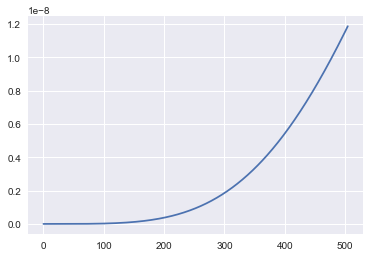

In [29]:
plt.plot(demo.times-demo.times[0], (demo.states[:,6,:]-demo.states[:,0,:])[:,0]-demo.states[:,12,:][:,0]*1e-6)
#plt.plot(demo.times-demo.times[0], demo.states[:,7,:][:,0]*1e-6)

(-1, 3)

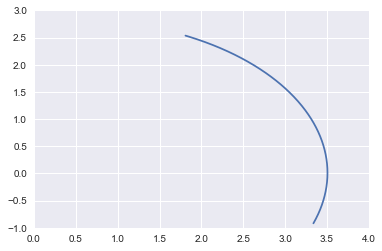

In [6]:
plt.plot(demo.states[:,0,:][:,0], demo.states[:,0,:][:,1])
plt.xlim(0, 4)
plt.ylim(-1, 3)

In [ ]:
del(demo.instates)
del(demo.times)
del(demo.states)

In [ ]:
import importlib
importlib.reload(demo)

In [ ]:
import subprocess

In [ ]:
# Imports / set-up
import numpy as np ;
import os,sys ;
sys.path.append(os.environ['REBX_DIR']) ;
from examples.ephem_forces.ephem_forces import integration_function ;
tstart=2456117.641933589 ;
tstep=20 ;
trange=1000 ;
geocentric=False ;
n_particles=1 ;
reparsed_input=np.array([-2.0938349524664743,1.0009137200092553,0.41979849545335507,-0.004226738336365523, -0.009129140909705197, -0.0036271214539287102])


# Call that will randomly crash with malloc ...
integration_function(tstart, tstep, trange, geocentric,n_particles, reparsed_input)

In [ ]:
state = np.array((3.338876057509365E+00, -9.176517956664152E-01, -5.038590450387491E-01, 2.805663678557796E-03, 7.550408259144305E-03, 2.980028369986096E-03))
scales = np.logspace(-7, -3, 81)
results_dict = {}

for scale in scales:
    print('%12.3e' % scale)

    with open('test_ic', 'w') as f:
        f.write('tepoch 2458849.5\n')
        f.write('tstart 2458849.5\n')
        f.write('tstep 20.0\n')
        f.write('trange 500.\n')
        f.write('geocentric 0\n')

        f.write('state\n%23.16le %23.16le %23.16le\n%23.16le %23.16le %23.16le\n' % tuple(state))
        for v in state+np.identity(6)*scale:
            f.write('state\n%23.16le %23.16le %23.16le\n%23.16le %23.16le %23.16le\n' % tuple(v))

    output = subprocess.run(["./rebound", "test_ic", str(scale)], stdout=subprocess.PIPE)

    arr =np.loadtxt('out_states.txt')

    t = arr[:,0]

    px = arr[:,1:4]
    py = arr[:,7:10]
    pz = arr[:,13:16]
    
    results_dict[scale] = t, px, py, pz
    

In [ ]:
def plot_results(results):
    t, p0, p1, p2 = results
    d = np.linalg.norm(p0, axis=1)
    z = np.polyfit(t, d, deg=2)
    f = np.poly1d(z)
    plt.plot(t, d-f(t), label='x')
    #plt.plot(t, d, label='x')
    d = np.linalg.norm(p1, axis=1)
    z = np.polyfit(t, d, deg=2)
    f = np.poly1d(z)
    plt.plot(t, d-f(t), label='y')
    #plt.plot(t, d, label='y')
    d = np.linalg.norm(p2, axis=1)
    z = np.polyfit(t, d, deg=2)
    f = np.poly1d(z)
    plt.plot(t, d-f(t), label='z')
    #plt.plot(t, d, label='z')
    plt.legend()

In [ ]:
prec_x = np.array(sorted([(k, np.linalg.norm(p0[-1]), np.linalg.norm(p1[-1]), np.linalg.norm(p2[-1])) for k, (t, p0, p1, p2) in results_dict.items()]))



In [ ]:
plt.plot(prec_x[:,0], prec_x[:, 1])
plt.plot(prec_x[:,0], prec_x[:, 2])
plt.plot(prec_x[:,0], prec_x[:, 3])
plt.yscale('log')
plt.xscale ('log')

In [ ]:
plot_results(results_dict[1e-6])

In [ ]:
np.logspace(-8, -2, num=10)

In [ ]:
output.stdout

In [ ]:
np.linalg.solve(a, b)

In [ ]:
a = np.array([[1, -1, -1], [2, 3, 2], [4, 3, -2]])

In [ ]:
b = np.array([1, 8, -2])

In [ ]:
np.linalg.solve(a, b)

In [ ]:
a = np.array([[4, 6, -3], [3, 4, -6], [6, -3, 4]])

In [ ]:
b = np.array([24, 2, 46])

In [ ]:
np.linalg.solve(a, b)

In [ ]:
from ctypes import *

In [ ]:
libc = CDLL("libc.dylib")

In [ ]:
print(libc.time(None))  

In [ ]:
c_int()

In [ ]:
i = c_int(42)

In [ ]:
print(i)

In [ ]:
print(i.value)

In [ ]:
i.value=-99
print(i.value)

In [ ]:
s = "Hello, World"
c_s = c_wchar_p(s)
print(c_s)

In [ ]:
c_wchar_p(139966785747344)
print(c_s.value)

In [ ]:
print(c_s)

In [ ]:
c_s.value = "Hi, there"
print(c_s)              # the memory location has changed

In [ ]:
c_wchar_p(139966783348904)
>>> print(c_s.value)

In [ ]:
print(s)                # first object is unchanged


In [ ]:
p = create_string_buffer(3)            # create a 3 byte buffer, initialized to NUL bytes
print(sizeof(p), repr(p.raw))

In [ ]:
p = create_string_buffer(b"Hello")     # create a buffer containing a NUL terminated string
print(sizeof(p), repr(p.raw))

In [ ]:
print(repr(p.value))

In [ ]:
p = create_string_buffer(b"Hello", 10) # create a 10 byte buffer
print(sizeof(p), repr(p.raw))

In [ ]:
p.value = b"Hi"
print(sizeof(p), repr(p.raw))

In [ ]:
printf = libc.printf
printf(b"Hello, %s\n", b"World!")

In [ ]:
printf(b"Hello, %S\n", "World!")

In [ ]:
Hello, World!
14
>>> printf(b"Hello, %S\n", "World!")
Hello, World!
14
>>> printf(b"%d bottles of beer\n", 42)
42 bottles of beer
19
>>> printf(b"%f bottles of beer\n", 42.5)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ArgumentError: argument 2: exceptions.TypeError: Don't know how to convert parameter 2
>>>